## Data preparation – How do we organize the data for modeling?



### Select data

I will create a new data frame by dorpping other unecesary colums as well as the Class column.

I'm goin to carry out a PCA to do this.



In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [23]:
dr14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skyserver_adradev_DR14.csv")
dr14

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237646798137852371,121.820752,0.931990,19.37035,17.34262,16.35286,15.92400,15.58903,308,301,5,104,5342663162779901952,GALAXY,0.101993,4745,55892,975
1,1237646798137918215,122.087900,0.843147,19.05249,17.03777,16.07633,15.63148,15.31245,308,301,5,105,5342400104622956544,GALAXY,0.101533,4745,55892,18
2,1237646798138245746,122.863995,0.896151,18.20631,16.89692,16.46658,16.31574,16.28902,308,301,5,110,2316073479176218624,STAR,0.000488,2057,53816,354
3,1237646798138310950,122.981945,0.963857,17.63113,16.55926,16.24861,16.14775,16.13221,308,301,5,111,2338584330990807040,STAR,0.000132,2077,53846,328
4,1237646798138310972,122.988638,0.973743,15.99172,14.98865,14.70003,14.64919,14.50626,308,301,5,111,2316072929420404736,STAR,0.000093,2057,53816,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1237651755091689608,197.462885,3.309304,18.56033,17.22085,16.41203,16.02500,15.73324,1462,301,6,481,591201118567032832,GALAXY,0.110601,525,52295,377
9996,1237651755091755116,197.643419,3.361471,19.48133,18.36759,17.76637,17.34260,17.09888,1462,301,6,482,591198369787963392,GALAXY,0.110570,525,52295,367
9997,1237651755091755128,197.665024,3.297791,19.27929,18.38898,18.03337,17.91430,17.85355,1462,301,6,482,4511676729161392128,STAR,-0.000107,4007,55327,712
9998,1237651755091820576,197.767442,3.418576,17.72724,15.89321,15.09945,14.69967,14.38937,1462,301,6,483,591209364904241152,GALAXY,0.025301,525,52295,407


In [24]:
# Rename classs column to Class to avoid python name errors
dr14 = dr14.rename(columns={'class':'Class'})

In [25]:
data_L=dr14.copy()

In [26]:
data_L.sample(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,Class,redshift,plate,mjd,fiberid
392,1237648705131249776,222.930124,0.551960,17.68786,16.79101,16.52302,16.42408,16.39017,752,301,5,530,3275405085034702848,STAR,0.000035,2909,54653,590
6702,1237651737913196740,199.971474,3.559991,18.54593,18.05981,17.37384,16.94707,16.71220,1458,301,6,502,592336089730017280,QSO,0.208912,526,52312,410
5573,1237651252550893730,113.494908,36.308434,19.08097,17.62776,16.97452,16.71798,16.58139,1345,301,6,29,2311621000631969792,STAR,-0.000167,2053,53446,540
7344,1237651752386363588,149.525411,0.908007,19.11690,17.81824,17.24333,16.96247,16.84459,1462,301,1,161,3228059286789711872,STAR,-0.000096,2867,54479,379
466,1237650762923507884,170.998391,-1.518476,18.63179,18.18673,18.02380,17.68875,17.83545,1231,301,6,12,367135493575436288,GALAXY,0.120628,326,52375,335


In [27]:
L_model = LabelEncoder()

In [28]:
for col in dr14.columns:
  data_L[col] = L_model.fit_transform(data_L[col])

data_L.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,Class,redshift,plate,mjd,fiberid
0,0,687,1398,8033,4083,2946,2617,2332,0,0,4,93,9223,0,7508,415,302,848
1,1,699,1245,5815,2957,2075,1747,1582,0,0,4,94,9222,0,7498,415,302,17
2,2,731,1334,2438,2536,3327,3904,4466,0,0,4,99,7228,2,3365,259,159,353
3,3,737,1451,1260,1676,2599,3357,3970,0,0,4,100,7257,2,2855,261,160,327
4,4,738,1471,76,138,250,392,464,0,0,4,100,7227,2,2714,259,159,351


<Axes: >

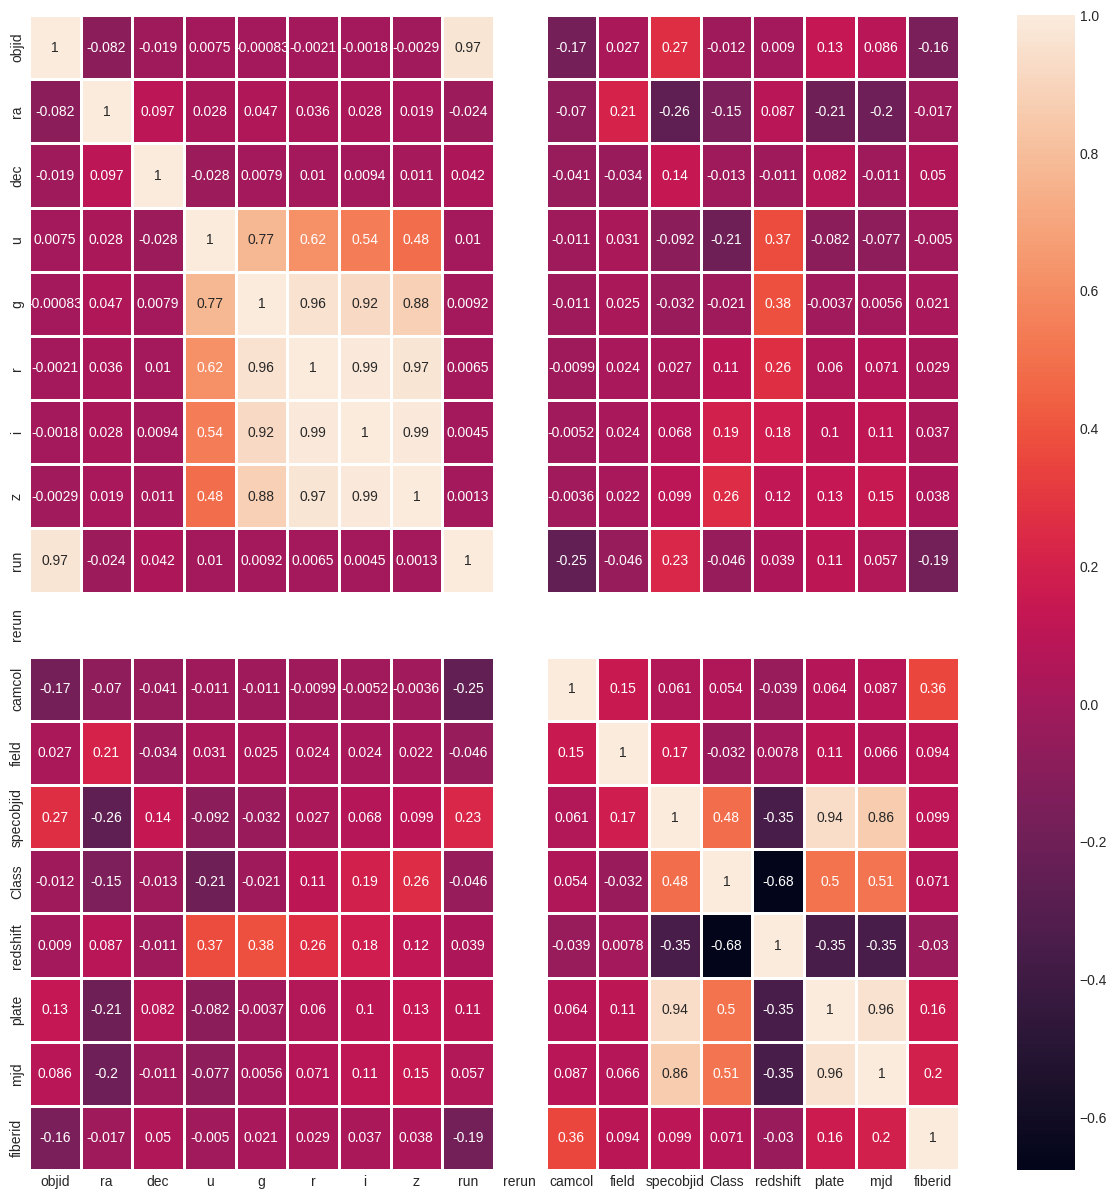

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_L.corr(),annot=True, linewidths=1)

In [30]:
dr14.drop(['ra', 'fiberid','field','plate'], axis=1, inplace=True)

<ipython-input-31-3685d24b60ee>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'MJD of observation')

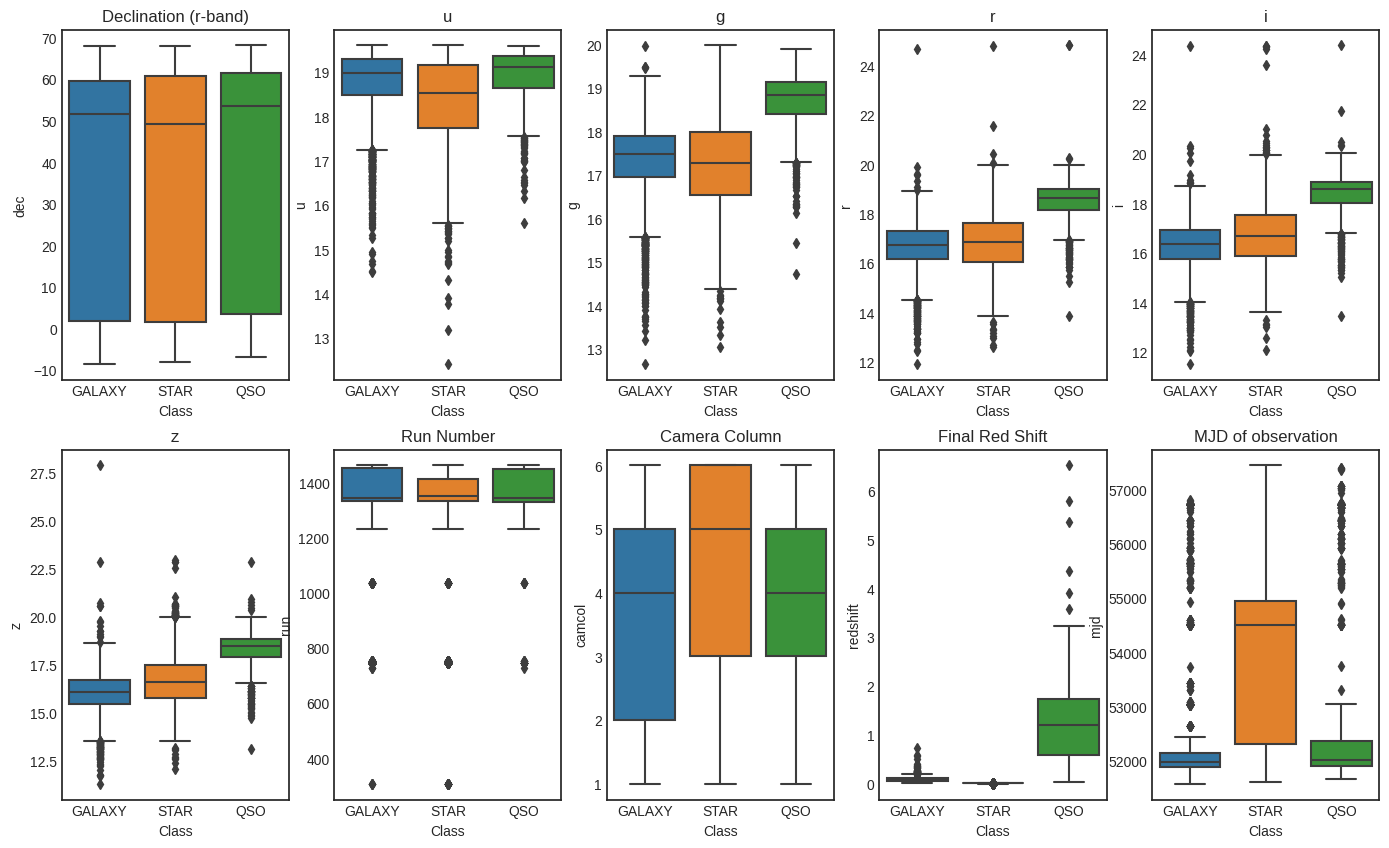

In [31]:
plt.figure(figsize = (17, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(2,5,1)
sns.boxplot(x='Class',y='dec',data=dr14)
ax.set_title('Declination (r-band)')
ax=plt.subplot(2,5,2)
sns.boxplot(x='Class',y='u',data=dr14)
ax.set_title('u')
ax=plt.subplot(2,5,3)
sns.boxplot(x='Class',y='g',data=dr14)
ax.set_title('g')
ax=plt.subplot(2,5,4)
sns.boxplot(x='Class',y='r',data=dr14)
ax.set_title('r')
ax=plt.subplot(2,5,5)
sns.boxplot(x='Class',y='i',data=dr14)
ax.set_title('i')
ax=plt.subplot(2,5,6)
sns.boxplot(x='Class',y='z',data=dr14)
ax.set_title('z')
ax=plt.subplot(2,5,7)
sns.boxplot(x='Class',y='run',data=dr14)
ax.set_title('Run Number')
ax=plt.subplot(2,5,8)
sns.boxplot(x='Class',y='camcol',data=dr14)
ax.set_title('Camera Column')
ax=plt.subplot(2,5,9)
sns.boxplot(x='Class',y='redshift',data=dr14)
ax.set_title('Final Red Shift')
ax=plt.subplot(2,5,10)
sns.boxplot(x='Class',y='mjd',data=dr14)
ax.set_title('MJD of observation')

### Format data

To create the new data frame I will define a tweak function with all the transformations I need.


In [32]:
def drop_columns(df):
  dc=['rerun', 'objid', 'ra', 'fiberid','field','plate']
  for col in sorted(df.columns):
    if col in dc:
      df.drop(col, axis=1, inplace=True)
  return df

In [33]:
# The purpose of this function is create new data set replacing the outlier data using the clip function
def tweak_dr(dr14):
  drop_columns(dr14)
  return(dr14
      .rename(columns={'class': 'Class'})
      .assign(dec= lambda df_: df_.dec.clip(lower= dr14.dec.quantile(.25),
                                            upper= dr14.dec.quantile(.75)),
              u= lambda df_: df_.u.clip(lower= dr14.u.quantile(.25),
                                        upper= dr14.u.quantile(.75)),
              g= lambda df_: df_.g.clip(lower= dr14.g.quantile(.25),
                                        upper= dr14.g.quantile(.75)),
              r= lambda df_: df_.r.clip(lower= dr14.r.quantile(.25),
                                        upper= dr14.r.quantile(.75)),
              i= lambda df_: df_.i.clip(lower= dr14.i.quantile(.25),
                                        upper= dr14.i.quantile(.75)),
              z= lambda df_: df_.z.clip(lower= dr14.z.quantile(.25),
                                        upper= dr14.z.quantile(.75)),
              camcol= lambda df_: df_.camcol.clip(lower= dr14.camcol.quantile(.25),
                                                  upper= dr14.camcol.quantile(.75),),

      )

  )

In [34]:
dr14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Skyserver_adradev_DR14.csv")
dr14_2=tweak_dr(dr14)

In [35]:
dr14_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        10000 non-null  float64
 1   u          10000 non-null  float64
 2   g          10000 non-null  float64
 3   r          10000 non-null  float64
 4   i          10000 non-null  float64
 5   z          10000 non-null  float64
 6   run        10000 non-null  int64  
 7   camcol     10000 non-null  int64  
 8   specobjid  10000 non-null  uint64 
 9   Class      10000 non-null  object 
 10  redshift   10000 non-null  float64
 11  mjd        10000 non-null  int64  
dtypes: float64(7), int64(3), object(1), uint64(1)
memory usage: 937.6+ KB
